In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline

In [44]:
data = pd.read_csv( 'hw_25000.csv', names = ['index', 'height_inches', 'weight_pounds'], header = 0 )
data.head()

,index,height_inches,weight_pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [45]:
# переводим высоту в сантиметры и кг

data['height'] = data['height_inches'] * 2.54
data['weight'] = data['weight_pounds'] * 0.454

data.head()

,index,height_inches,weight_pounds,height,weight
0,1,65.78331,112.9925,167.089607,51.298595
1,2,71.51521,136.4873,181.648633,61.965234
2,3,69.39874,153.0269,176.272800,69.474213
3,4,68.21660,142.3354,173.270164,64.620272
4,5,67.78781,144.2971,172.181037,65.510883


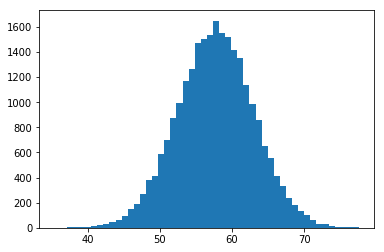

In [46]:
plt.hist( data['weight'], bins = 50 )
plt.show()

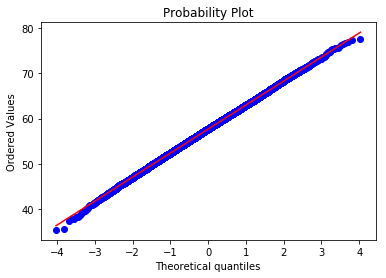

In [47]:
# проверим "нормальность" нашего распределения с помощью QQ-plot

stats.probplot( data['weight'], dist="norm", plot=plt )
plt.show()

In [48]:
def weightGroup( row ):
    """
    Простая функция разделения на рост от 170 до 180 и остальных
    """
    
    # проверяем, что значение не равно NaN
    if not pd.isnull( row['height'] ):
        if row['height'] >= 170 and row['height'] <= 180:
            return 'sample2'
    # если значение NaN, то возвращаем Undef
    return 'Undef'

In [49]:
# применим функцию weightGroup к DataFrame и выведем результат в отдельный столбец weightGroup

data['weighGroup'] = data.apply( weightGroup, axis = 1 )
data.head(10)

,index,height_inches,weight_pounds,height,weight,weighGroup
0,1,65.78331,112.9925,167.089607,51.298595,Undef
1,2,71.51521,136.4873,181.648633,61.965234,Undef
2,3,69.39874,153.0269,176.272800,69.474213,sample2
3,4,68.21660,142.3354,173.270164,64.620272,sample2
4,5,67.78781,144.2971,172.181037,65.510883,sample2
5,6,68.69784,123.3024,174.492514,55.979290,sample2
6,7,69.80204,141.4947,177.297182,64.238594,sample2
7,8,70.01472,136.4623,177.837389,61.953884,sample2
8,9,67.90265,112.3723,172.472731,51.017024,sample2
9,10,66.78236,120.6672,169.627194,54.782909,Undef


In [56]:
mask = ( data.weighGroup=='sample2')

In [57]:
mask[:5]

0    False
1    False
2     True
3     True
4     True
Name: weighGroup, dtype: bool

In [68]:
sample2=data.loc[ mask ]
sample2=sample2[:20]
sample2.shape

(20, 6)

In [76]:
np.mean( sample2['weight'] ),np.std( sample2['weight'] )

(60.34754594000001, 5.154677720386427)

In [74]:
np.mean( data['weight'] ), np.std( data['weight'] )

(57.69405720700326, 5.293941611867646)

In [73]:
stats.ttest_1samp( sample2['weight'], data['weight'].mean())

Ttest_1sampResult(statistic=2.2438433326709446, pvalue=0.036952752151284574)